# Chapter 9: Up and Running with TensorFlow

## Exercise 1
What are the main benefits of creating a computation graph rather than directly executing the computations? What are the main drawbacks?

Benefits:
* You can break up the graph in several parts and run them in parallel across different CPUs or GPUs. You could even distribute them across different servers, you can train colossal neural networks in a reasonable amount of time. 
* TensorFlow can automatically compute the gradients fro you.
* It simplifies introspection (e.g. using TensorBoard).

Drawbacks:
* It is more difficult to learn.
* It makes step-by-step debugging harder.

## Exercise 2
Is the statement a_val = a.eval(session=sess) equivalent to a_val = sess.run(a)?

Yes, they are equivalent.

## Exercise 3
Is the statement a_val, b_val = a.eval(session=sess), b.eval(session=sess) equivalent to a_val, b_val = sess.run([a, b])?

No, they are not the same. The first statement runs the graph twice (one time to compute a_val, and another time to compute b_val), while the second statement runs the graph once to compute both values. If any of these operations (or the operations they depend on) has side effects, the result could be different.

## Exercise 4
Can you run two graphs in the same session?

No, you can't run two graphs in the same session.

## Exercise 5
If you create a graph g containing a variable w, then start two threads and open a session in each thread, both using the same graph g, will each session have its own copy of the variable w or will it be shared?

In this case, each thread will have its own copy of the variable w. However, in distributed TensorFlow they will share the same variable w.

## Exercise 6
When is a variable initialized? When is it destroyed?

A variable is initialized when you call its initializer, and it is destroyed when its session ends.

## Exercise 7
What is the difference between a placeholder and a variable?

A placeholder allows you to define a graph that depends on some value that will be later on passed to it in the execution phase. It is usually used to pass input data to the graph.
A variable is pretty similar to the usual programming variable. It has a value from the start, and you can assign new values to it both in the construction phase (with tf.assign) and in the execution phase (with the assigment operator).

## Exercise 8
What happens when you run the graph to evaluate an operation that depends on a placeholder but you don't feed its value? What happens if the operation does not depend on the placeholder?

In [1]:
import tensorflow as tf

tf.reset_default_graph()
x = tf.placeholder(tf.float32, None)
y = x + 2
with tf.Session() as sess:
    try:
        result = y.eval()
    except Exception:
        print("Caught an exception!")
    else:
        print("No exception caught: result was {}".format(result))


Caught an exception!


In [2]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, None)
y = tf.Variable(5, name="y")
z = y * 2
with tf.Session() as sess:
    try:
        y.initializer.run()
        result = z.eval()
    except Exception:
        print("Caught an exception!")
    else:
        print("No exception caught: result was {}".format(result))

No exception caught: result was 10


## Exercise 9
When you run a graph, can you feed the output value of any operation, or just the value of placeholders?

You can feed the output value of any operation. However, it is pretty rare to feed the output value of operations other than placeholders.

## Exercise 10
How can you set a variable to any value you want (during the execution phase)?

You can create an assignment node during the construction phase, so later on during the execution phase the value of the variable specified in the assignment node will be changed.

## Exercise 11
How many times does reverse-mode autodiff need to traverse the graph in order to compute the gradients of the cost function with regards to 10 variables? What about forward-mode autodiff? And symbolic differentiation?

Reverse-mode autodiff need to traverse the graph only two times to compute the gradients of the cost function, regardless of the number of variables.<br>
Forward-mode autodiff would need to run once for each variable, so it would run 10 times in this case.<br>
Symbolic differentiation would build a different graph to compute the gradients, so it would not traverse the original graph a single time.

## Exercise 12
Implement Logistic Regression with Mini-batch Gradient Descent using TensorFlow. Train it and evaluate it on the moons dataset. Try adding all the bells and whistles:
* Define the graph within a logistic_regression() function that can be reused easily.
* Save checkpoints using a Saver at regular intervals during training, and save the final model at the end of training.
* Restore the last checkpoint upon startup if training was interrupted.
* Define the graph using nice scopes so the graph looks good in TensorBoard.
* Add summaries to visualize the learning curves in TensorBoard.
* Try tweaking some hyperparameters such as the learning rate or the mini-batch size and look at the shape of the learning curve.

In [1]:
from sklearn.datasets import make_moons

RANDOM_SEED = 42
NUM_SAMPLES = 1000
X, y = make_moons(NUM_SAMPLES, noise=0.2, random_state=RANDOM_SEED)

In [2]:
from logistic_regressor import TFLogisticRegressor

log_reg = TFLogisticRegressor()
log_reg.fit(X, y)
y_pred = log_reg.predict(X)

In [3]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred, y)
print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.867


Plot decision boundary:

In [4]:
import numpy as np

xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = log_reg.predict_proba(grid)[:].reshape(xx.shape)

[(-3, 3), Text(0,0.5,'$X_2$'), (-3, 3), Text(0.5,0,'$X_1$'), None]

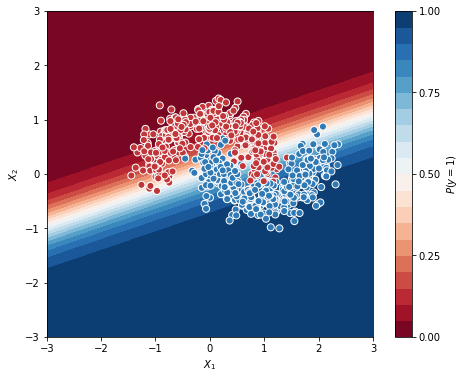

In [7]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 20, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[300:,0], X[300:, 1], c=y[300:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-3, 3), ylim=(-3, 3),
       xlabel="$X_1$", ylabel="$X_2$")

[(-3, 3), Text(0,0.5,'$X_2$'), (-3, 3), Text(0.5,0,'$X_1$'), None]

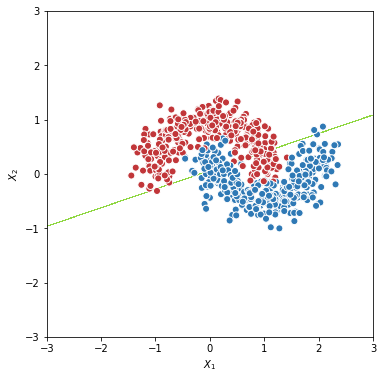

In [8]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, levels=[.5, .501], vmin=0, vmax=.6)

ax.scatter(X[300:,0], X[300:, 1], c=y[300:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-3, 3), ylim=(-3, 3),
       xlabel="$X_1$", ylabel="$X_2$")